**Name:** Fateme Raeijian

**Student Number:** 402203389

# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)
%matplotlib inline

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [2]:
from sklearn.datasets import fetch_openml

# Using `fetch_openml`, download `Fashion-MNIST` 
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)


(70000, 784) (70000,)


In [3]:
from sklearn.model_selection import train_test_split

# Using `train_test_split`, split your data into two sets. 
# Set the test_size to 10000

#############################
# Your code goes here (6 points)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [4]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
classes_to_keep = ['0', '1', '7']
mask = np.isin(y_train, classes_to_keep)
x_train = x_train[mask]
y_train = y_train[mask]
#############################

print(x_train.shape, y_train.shape)


(18022, 784) (18022,)


In [5]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
classes_to_keep = ['0', '1', '7']
mask = np.isin(y_test, classes_to_keep)
x_test = x_test[mask]
y_test = y_test[mask]
#############################

print(x_test.shape, y_test.shape)


(2978, 784) (2978,)


## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [24]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None
        self.inp_grad = None  # To store the gradient w.r.t input during backward pass

    def forward(self, x):
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)
        x_stable = x - np.max(x, axis=1, keepdims=True)  # For numerical stability
        exp_x = np.exp(x_stable)
        sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)
        self.output = exp_x / sum_exp_x
        self.inp = x  # Store input for backward pass
        #############################
        return self.output

    def backward(self, up_grad):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)
        s = self.output  # Softmax output from forward pass
        # Compute dot product between up_grad and softmax output
        tmp = np.sum(up_grad * s, axis=1, keepdims=True)
        # Compute gradient w.r.t input
        self.inp_grad = s * (up_grad - tmp)
        #############################
        return self.inp_grad  # Add this line to return the gradient

    def step(self, optimizer):
        pass


### The `Linear` Layer 

In [16]:
class Linear:
    def __init__(self, in_dim, out_dim):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)
        self.w = np.random.randn(in_dim, out_dim) * np.sqrt(2. / in_dim)
        self.b = np.zeros((1, out_dim))
        #############################
        self.dw = None
        self.db = None

    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)
        self.inp = inp  # Save input for backward pass
        z = np.dot(inp, self.w) + self.b
        #############################

        return z

    def backward(self, up_grad):
        # Calculate the gradient with respect to the weights 
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)
        self.dw = np.dot(self.inp.T, up_grad)
        self.db = np.sum(up_grad, axis=0, keepdims=True)
        down_grad = np.dot(up_grad, self.w.T)
        #############################
        return down_grad

    def step(self, optimizer):
        # Update the layer's weights and biases
        # Update previous_w_update and previous_b_update accordingly
        #############################
        # Your code goes here (5 points)
        self.w = optimizer.get_next_update(self.w, self.dw)
        self.b = optimizer.get_next_update(self.b, self.db)
        #############################


### The `ReLU` Layer

In [17]:
class RelU:
    def __init__(self):
        self.inp = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        output = np.maximum(0, inp)
        #############################
        return output

    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = up_grad * (self.inp > 0).astype(up_grad.dtype)
        #############################
        return down_grad

    def step(self, optimizer):
        pass


### The `sigmoid` Layer

In [18]:
class Sigmoid:
    def forward(self, inp):
        #############################
        # Your code goes here (4 points)
        self.out = 1 / (1 + np.exp(-inp))
        #############################
        return self.out

    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = up_grad * self.out * (1 - self.out)
        #############################
        return down_grad

    def step(self, optimizer):
        pass


## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [19]:
class CELoss():
    def __init__(self):
        pass

    def forward(self, pred, target):
        self.yhat = pred
        self.y = target
        m = self.y.shape[0]
        # Compute and return the loss 
        #############################
        # Your code goes here (8 points)
        epsilon = 1e-15  # To prevent log(0)
        loss = -np.sum(self.y * np.log(self.yhat + epsilon)) / m
        #############################
        return loss

    def backward(self):
        # Derivative of loss_fn with respect to the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)
        m = self.y.shape[0]
        grad = (self.yhat - self.y) / m
        #############################
        return grad


## Optimizer

In this section, you'll implement an optimizer classes


In [20]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)
        x_new = x - self.lr * dx
        return x_new
        #############################


## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [21]:
class MLP:
    def __init__(self, layers, loss_fn, optimizer):
        self.layers = layers 
        self.losses  = [] 
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)
        out = inp
        for layer in self.layers:
            out = layer.forward(out)
        return out
        #############################
        
    def loss(self, pred, label):
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def backward(self):
        # Start with loss function's gradient and 
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)
        grad = self.loss_fn.backward()
        for layer in reversed(self.layers):
            grad = layer.backward(grad)
        #############################
        
    def update(self):
        for layer in self.layers:
            layer.step(self.optimizer)


The following cell encodes training labels into a one-hot representation with 3 classes.

In [13]:
def onehot_enc(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary


In [14]:
label_mapping = {'0': 0, '1': 1, '7': 2}

y_train_mapped = np.array([label_mapping[val] for val in y_train])
y_train = onehot_enc(y_train_mapped, 3)

y_test_mapped = np.array([label_mapping[val] for val in y_test])
y_test = onehot_enc(y_test_mapped, 3)


In [30]:
def train(model, epochs, x, y):
    for n in range(epochs):
        # First do the forward pass. Next, compute the loss.
        # Then do the backward pass and finally, update the parameters.
        #############################
        # Your code goes here (4 points)
        pred = model.forward(x)
        loss = model.loss(pred, y)
        model.backward()
        model.update()
        #############################
        print(f"Loss at {n}: {loss:.3f}")


In [31]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)
layers = [
    Linear(in_dim=x_train.shape[1], out_dim=50),
    RelU(),
    Linear(in_dim=50, out_dim=50),
    RelU(),
    Linear(in_dim=50, out_dim=3),
    SoftMaxLayer()
]


optimizer = GradientDescent(lr=0.01)
loss_fn = CELoss()
nn = MLP(layers=layers, loss_fn=loss_fn, optimizer=optimizer)
#############################

epochs = 50

# Train the network using only `x_train` and `y_train` (no validation)
train(nn, epochs, x_train, y_train)


Loss at 0: 0.902
Loss at 1: 0.820
Loss at 2: 0.751
Loss at 3: 0.695
Loss at 4: 0.649
Loss at 5: 0.610
Loss at 6: 0.576
Loss at 7: 0.547
Loss at 8: 0.522
Loss at 9: 0.499
Loss at 10: 0.479
Loss at 11: 0.461
Loss at 12: 0.444
Loss at 13: 0.429
Loss at 14: 0.415
Loss at 15: 0.402
Loss at 16: 0.391
Loss at 17: 0.380
Loss at 18: 0.370
Loss at 19: 0.361
Loss at 20: 0.352
Loss at 21: 0.344
Loss at 22: 0.337
Loss at 23: 0.330
Loss at 24: 0.323
Loss at 25: 0.317
Loss at 26: 0.311
Loss at 27: 0.305
Loss at 28: 0.300
Loss at 29: 0.295
Loss at 30: 0.291
Loss at 31: 0.286
Loss at 32: 0.282
Loss at 33: 0.278
Loss at 34: 0.274
Loss at 35: 0.271
Loss at 36: 0.267
Loss at 37: 0.264
Loss at 38: 0.261
Loss at 39: 0.258
Loss at 40: 0.255
Loss at 41: 0.252
Loss at 42: 0.249
Loss at 43: 0.246
Loss at 44: 0.244
Loss at 45: 0.241
Loss at 46: 0.239
Loss at 47: 0.237
Loss at 48: 0.235
Loss at 49: 0.232


Let's plot the loss value for each iteration

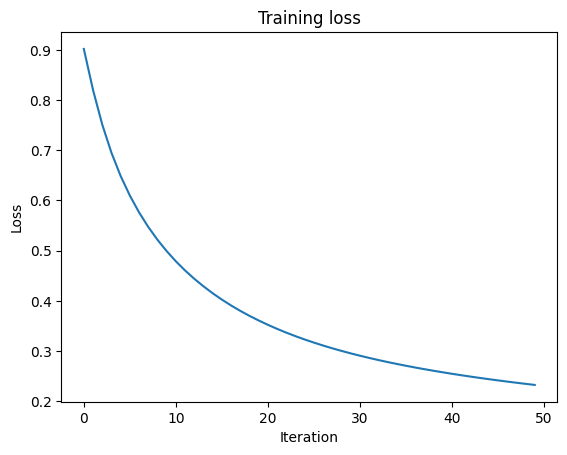

In [32]:
plt.plot(nn.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [35]:
# Compute the accuracy on the testing set
#############################
# Your code goes here (7 points)
predictions = nn.forward(x_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

acc = np.mean(predicted_labels == true_labels)
print(f"Test Accuracy: {acc * 100:.2f}%")

#############################

Test Accuracy: 95.43%
